In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import GradientBoostingClassifier
from keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from keras.optimizers import RMSprop
from keras.optimizers import SGD
from tensorflow.keras.layers import LeakyReLU

C:\Users\kater\AppData\Local\Temp\ipykernel_9140\1646728648.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [53]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('heart_failure.csv')

In [55]:
## Exploratory Data Analysis (EDA)

## Explore the dataset to understand the features, check for missing values, and gain insights into the data.
print(data.info())
print(data.describe())

## Based on the output, we can see that there are no missing values in the dataset, and all features are numerical.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None
             

In [56]:
## Data Cleaning
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [57]:
# Doing Univariate Analysis for statistical description and understanding of dispersion of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


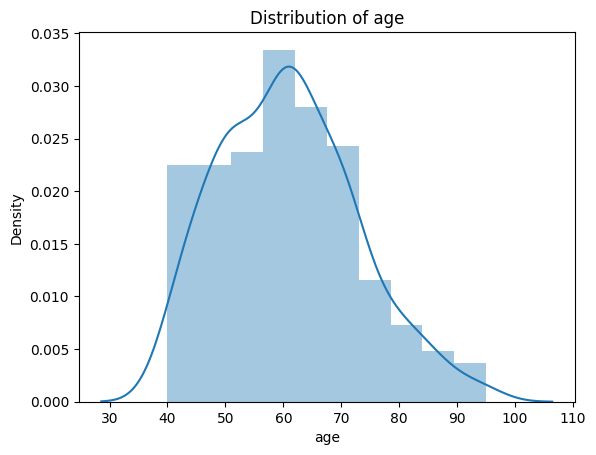

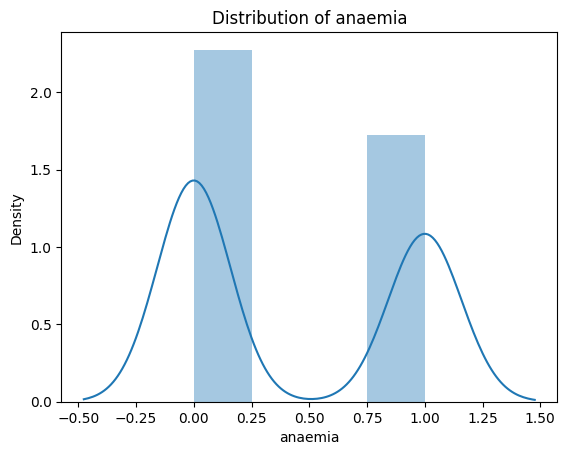

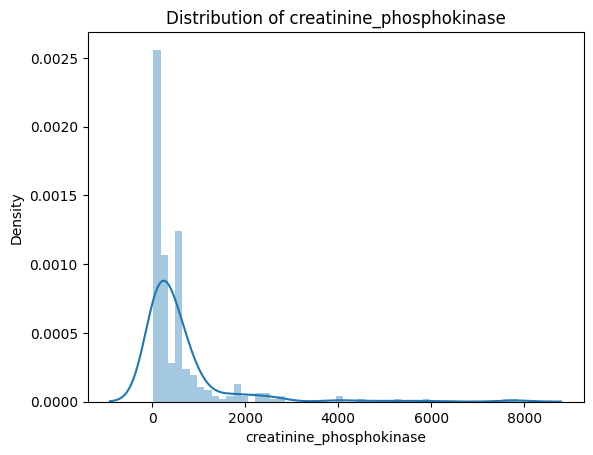

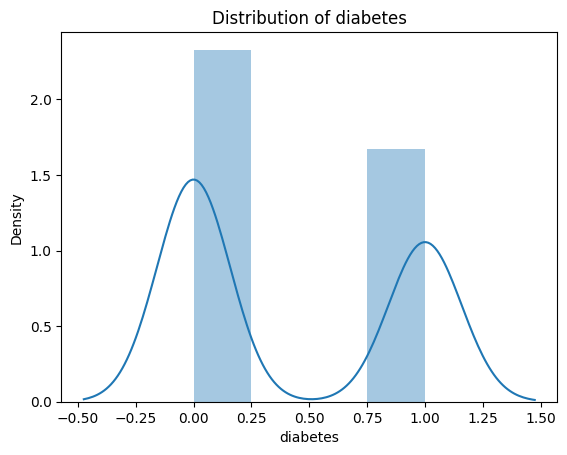

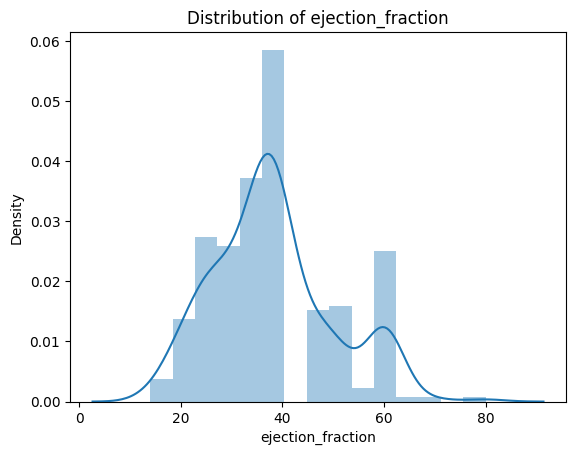

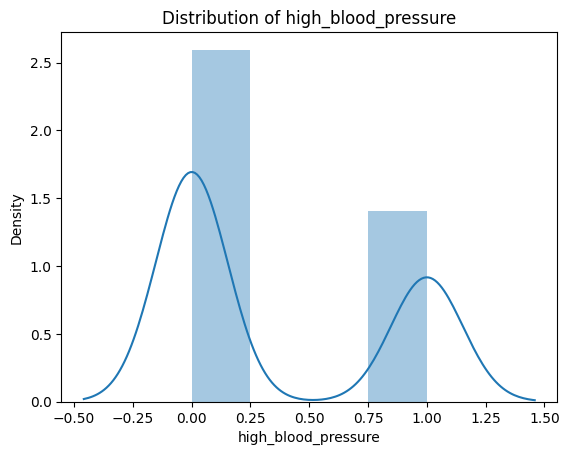

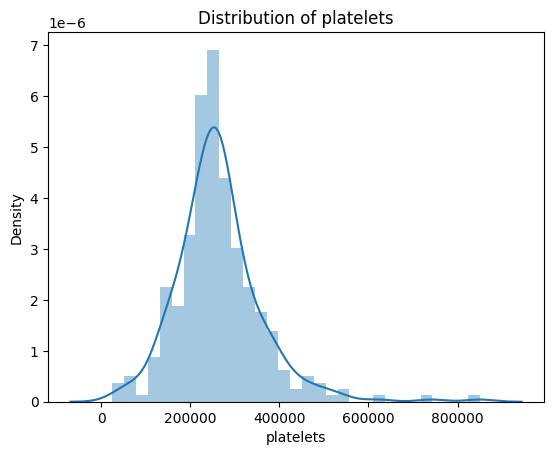

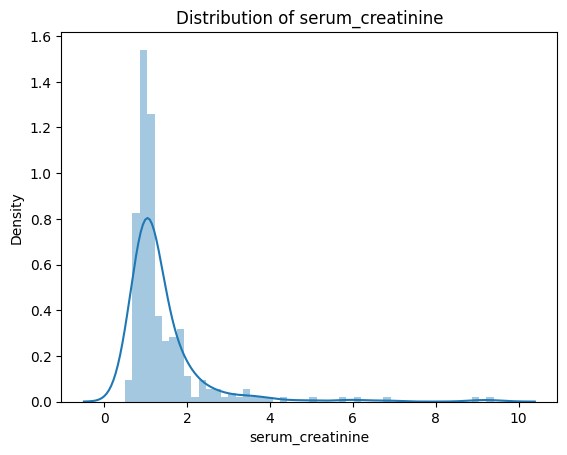

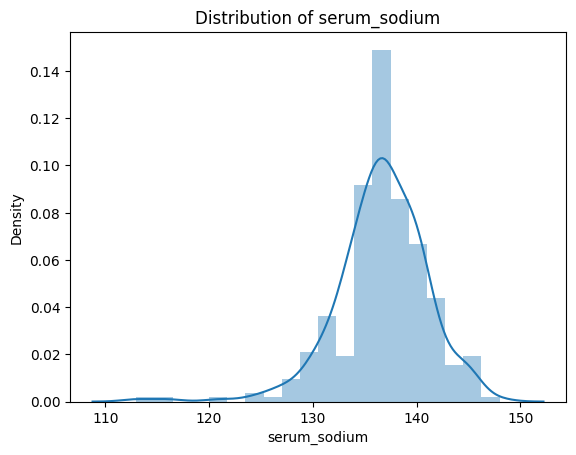

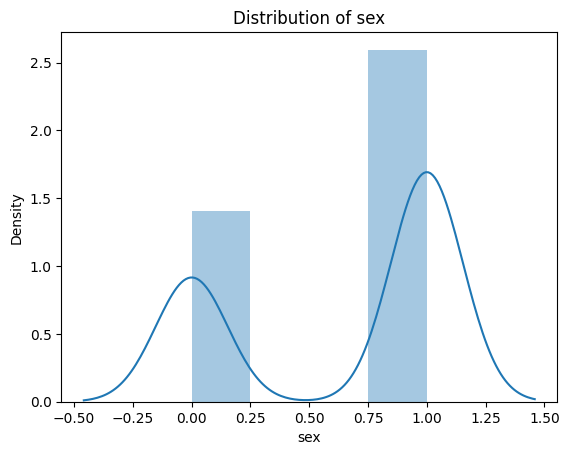

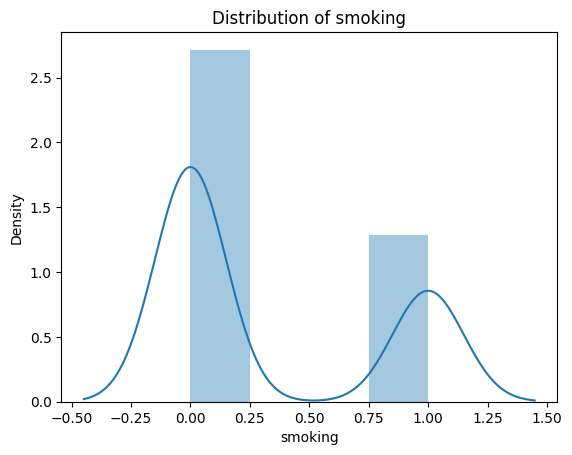

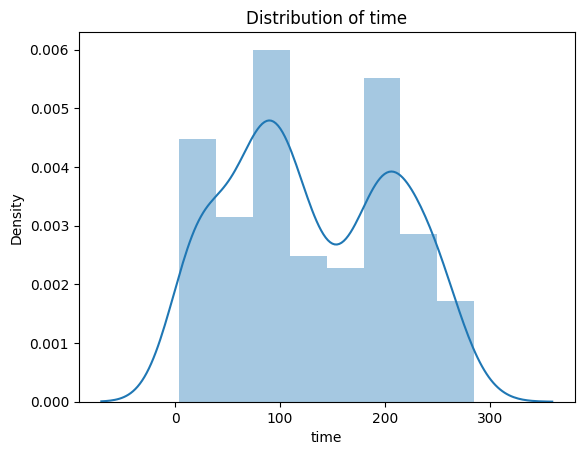

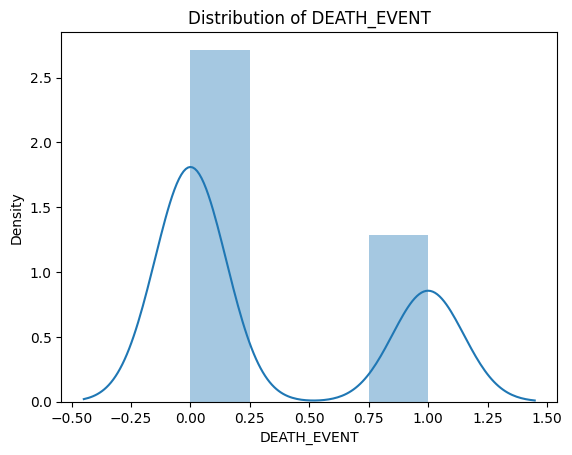

In [58]:
## to visualize the distribution of values in each column of the dataset individually
# Univariate Analysis
for col in data.columns:
    plt.figure()
    sns.distplot(data[col]) ##  smooth curve called a kernel density estimate (KDE). This curve represents the density of values in the dataset. 
    ## Higher peaks in the curve indicate regions where the data points are more densely packed, while lower peaks indicate less dense regions.
    ## The area under the curve represents the probability of observing values within a given interval
    plt.title(f'Distribution of {col}') ## distribution describes the overall pattern and spread of data values
    plt.show()

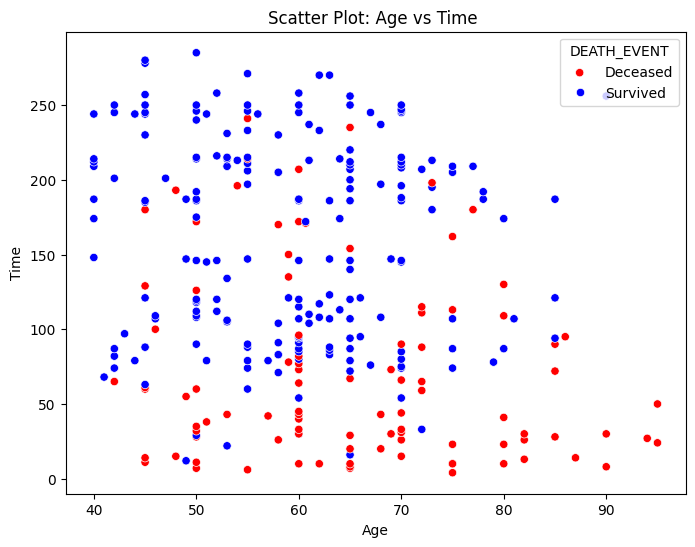

In [11]:

# Scatter plot for 'age' vs 'time' with hue='DEATH_EVENT'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='time', hue='DEATH_EVENT', data=data, palette={0: 'blue', 1: 'red'})

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Time')
plt.title('Scatter Plot: Age vs Time ')
plt.legend(title='DEATH_EVENT', loc='upper right', labels=['Deceased','Survived'])


# Show plot
plt.show()


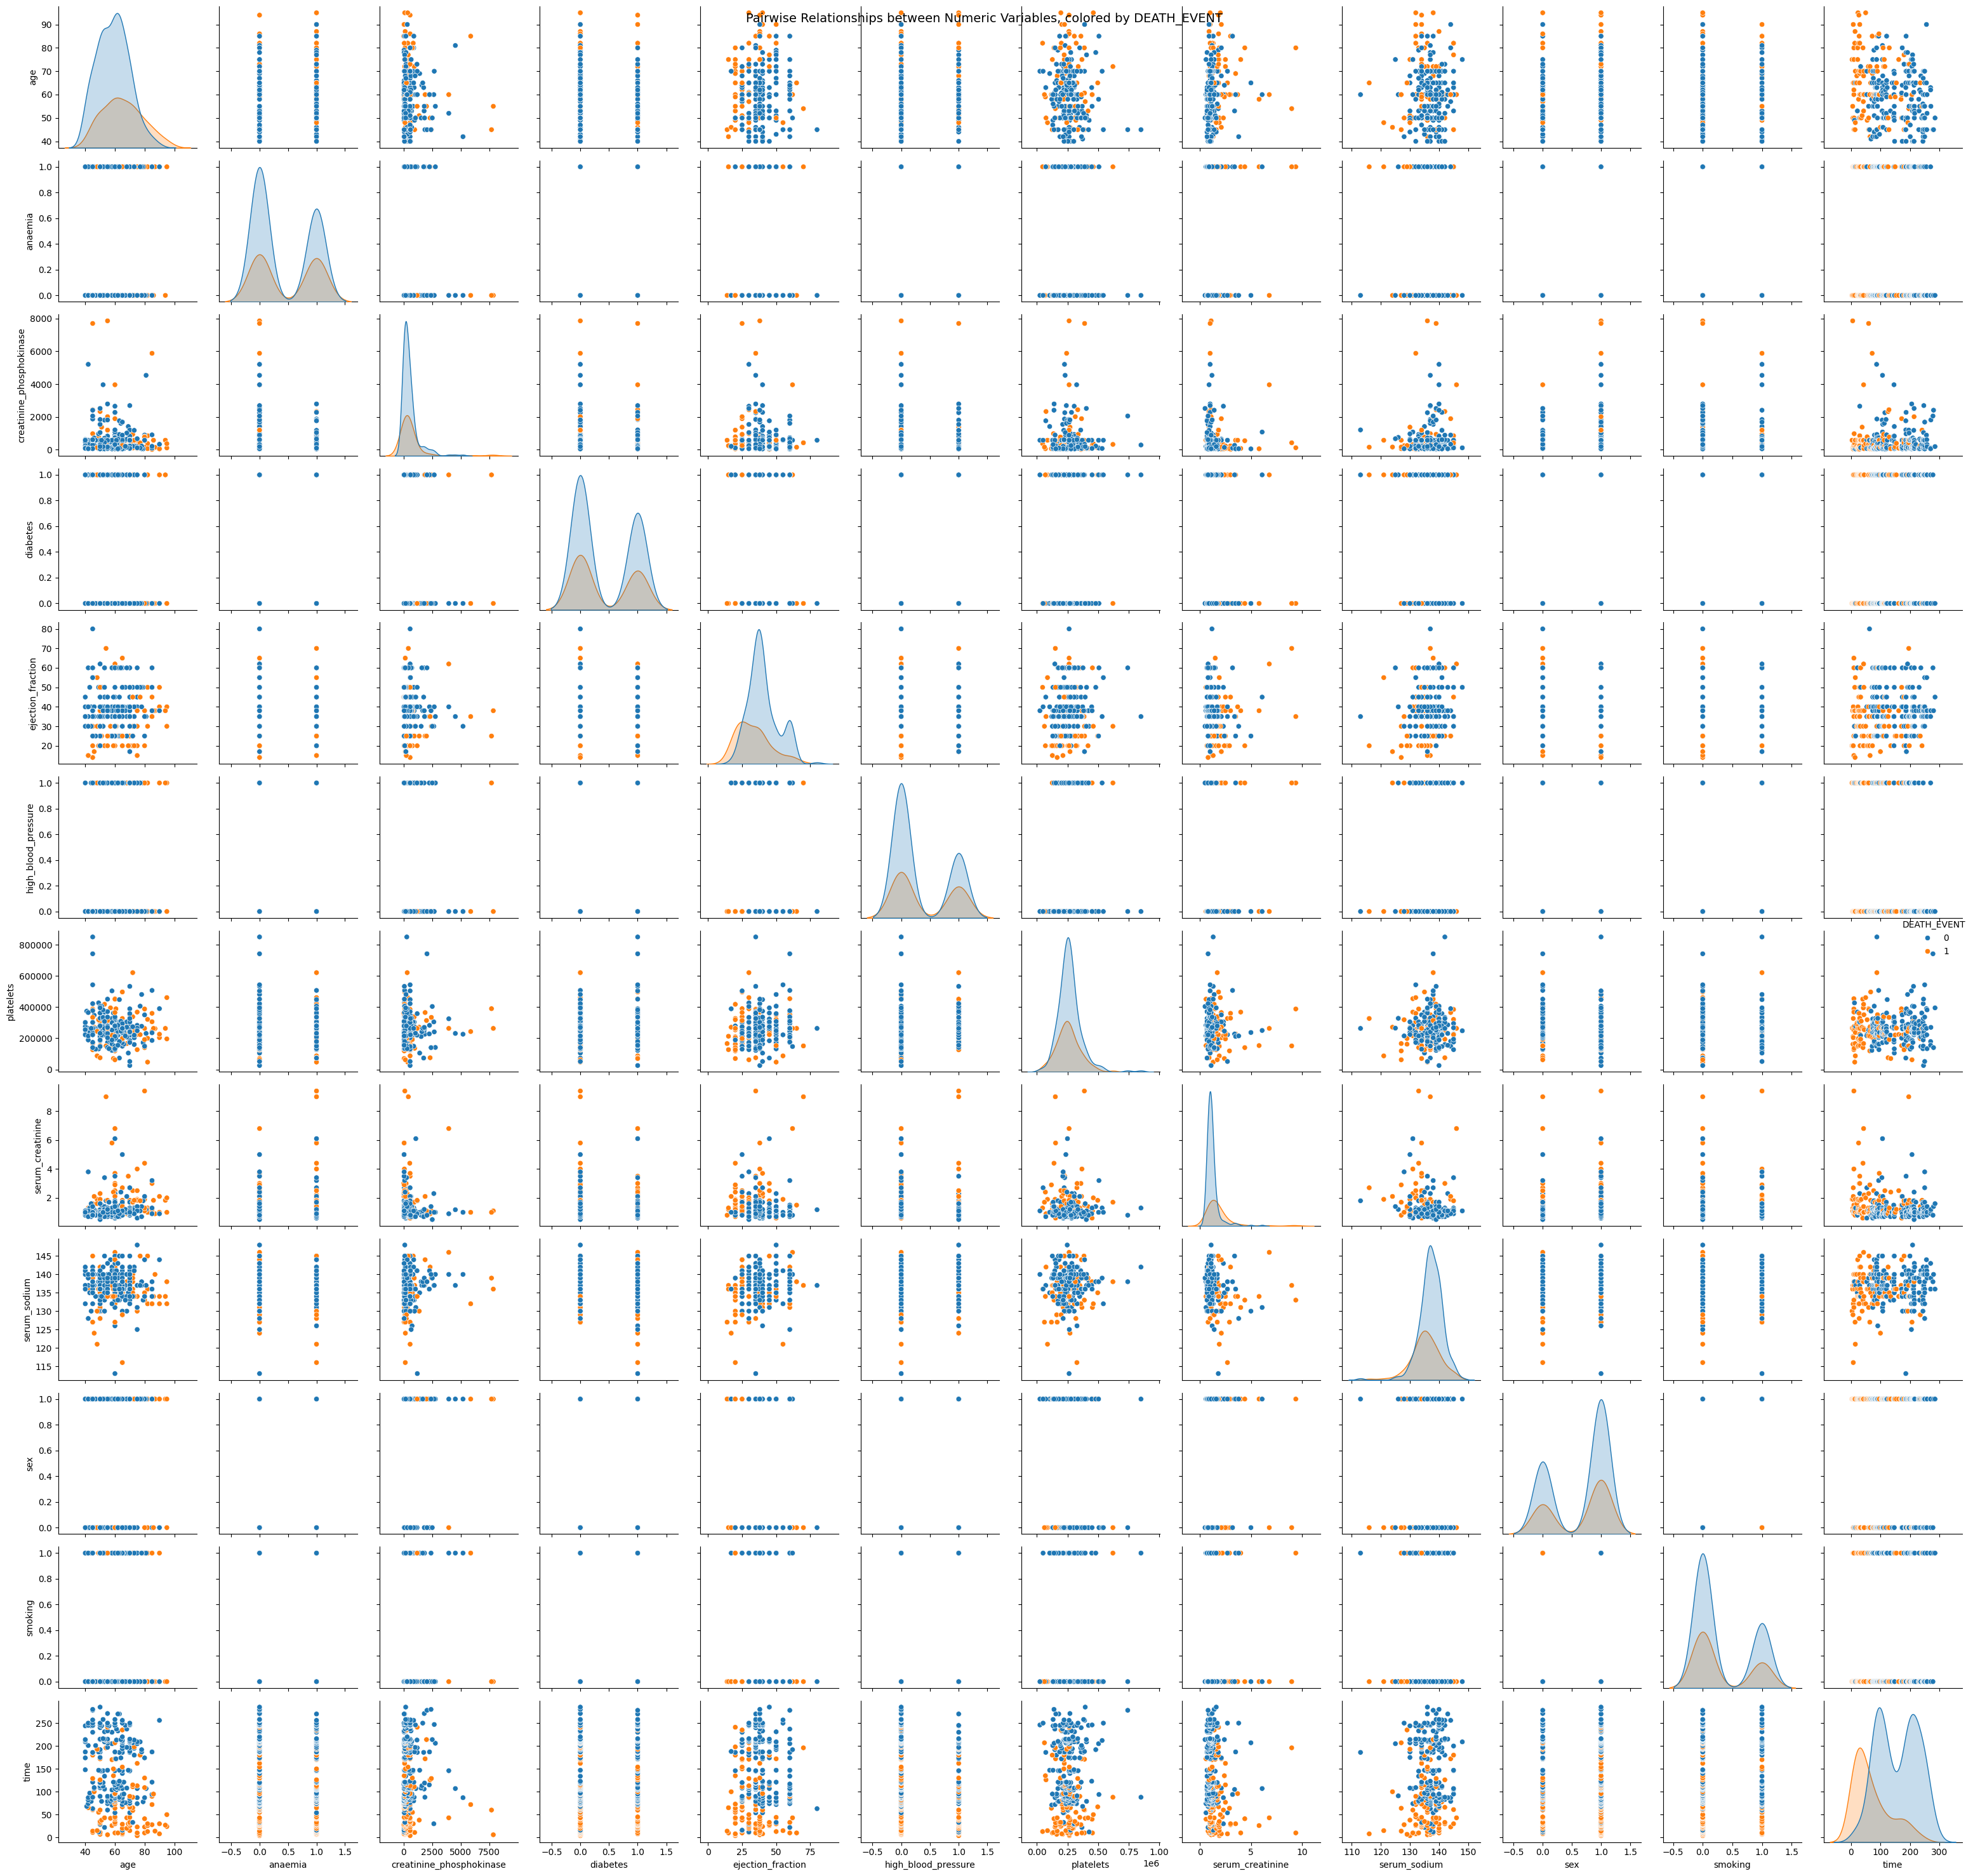

In [60]:
## Bivariate by pairplot

# Drop non-numeric columns if necessary
numeric_data = data.select_dtypes(include='number')

# Pair plot
pairplot = sns.pairplot(numeric_data, hue='DEATH_EVENT')

# Pair plot
# Add x-label, y-label, and title to each plot
for ax in pairplot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=10)
    ax.set_ylabel(ax.get_ylabel(), fontsize=10)
    ax.set_title(ax.get_title(), fontsize=12)

plt.suptitle('Pairwise Relationships between Numeric Variables, colored by DEATH_EVENT', fontsize=14)
plt.tight_layout()
plt.show()


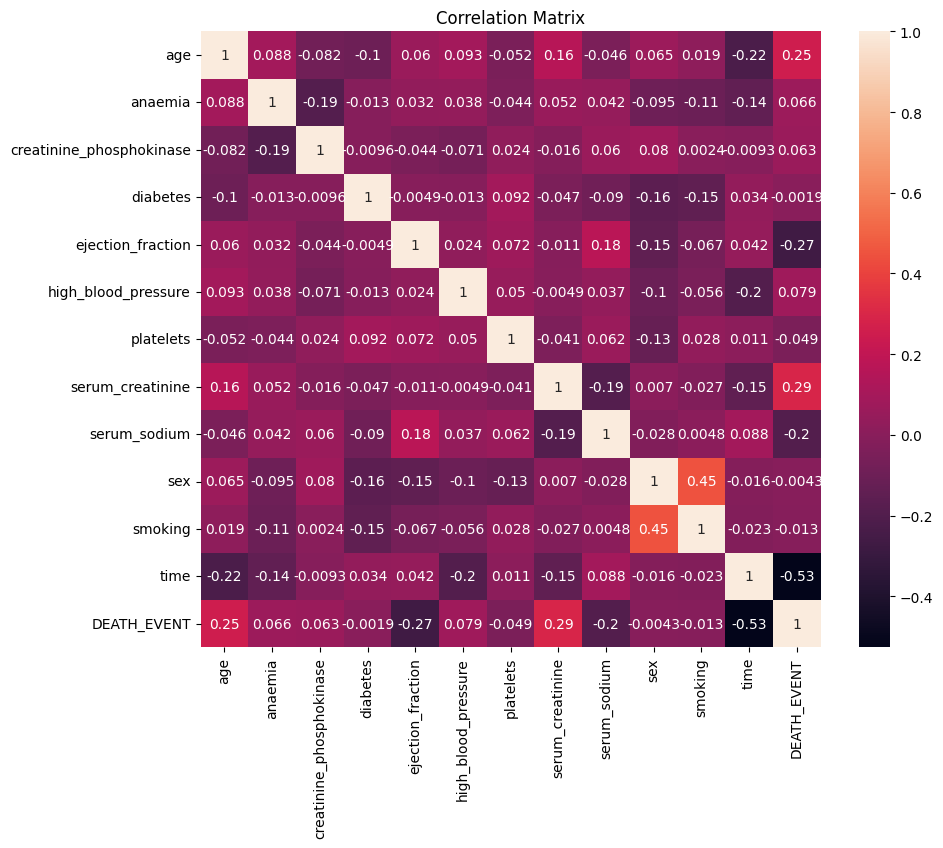

In [61]:
# Multivariate Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

Data Preprocessing

Before feeding the data into the ANN, we need to preprocess it by splitting it into features and target, encoding categorical variables (if any), and scaling the features.

In [62]:

# Separate features and target
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# Encode categorical variables
categorical_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LOGISTIC REGRESSION

In [63]:
## TRAIN THE LOGISTIC REGRESSION
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

LogisticRegression()

In [64]:
##  make the prediction
pred_LR = model_LR.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': pred_LR})


,Actual,Predicted
281,0,0
265,0,0
164,1,0
9,1,1
77,0,0
278,0,0
93,1,1
109,0,0
5,1,1
173,0,0


In [65]:
## evaluate the model accuracy
accuracy_LR = accuracy_score(y_test, pred_LR)

## CONFUSION MATRIX
conf_mat = confusion_matrix(y_test, pred_LR)

print(accuracy_LR)
print(conf_mat)


0.8
[[34  1]
 [11 14]]


In [66]:
# Step 1: Classification Report
print("Classification Report: Logisitic Regression")
print(classification_report(y_test, pred_LR))

Classification Report: Logisitic Regression
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.77        60
weighted avg       0.83      0.80      0.79        60



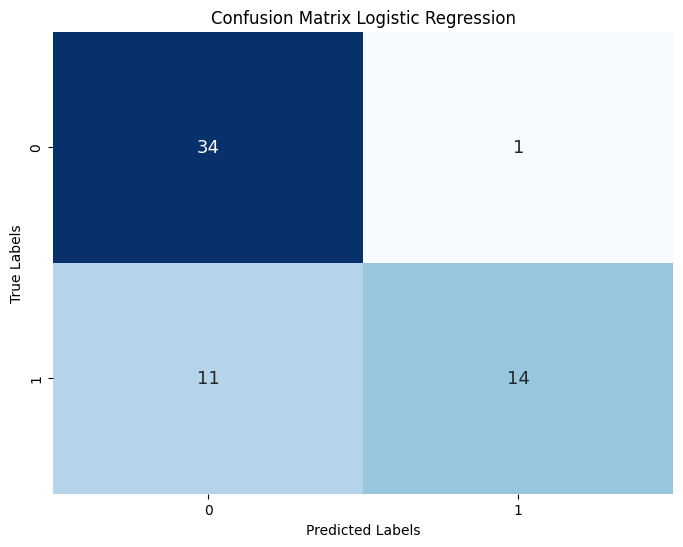

In [67]:
# Step 2: Confusion Matrix Plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', cbar=False, annot_kws={"size": 13})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Logistic Regression')
plt.show()




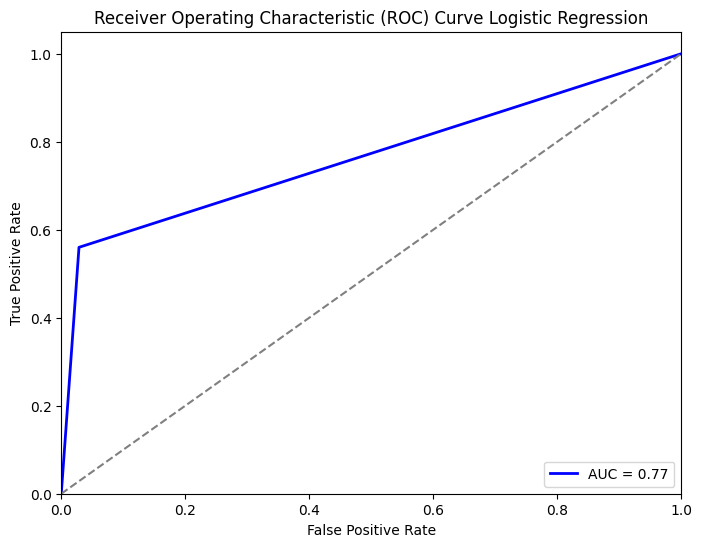

In [68]:
# Step 3: AUC-ROC Curve
auc = roc_auc_score(y_test, pred_LR)
fpr, tpr, thresholds = roc_curve(y_test, pred_LR)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Logistic Regression')
plt.legend(loc='lower right')
plt.show()


NAIVE BAYES

In [69]:
## naives bayes
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB()

In [70]:
## predict the test set
y_pred_NB = model_NB.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_NB})

,Actual,Predicted
281,0,0
265,0,0
164,1,0
9,1,1
77,0,0
278,0,0
93,1,0
109,0,1
5,1,1
173,0,0


In [71]:
## Evaluate the naive bayes model
accuracy_NB = accuracy_score(y_test, y_pred_NB)
conf_mat_NB = confusion_matrix(y_test, y_pred_NB)
print(accuracy_NB)
print(conf_mat_NB)
print("Classification Report: Naive Bayes")
print(classification_report(y_test,y_pred_NB))

0.7
[[33  2]
 [16  9]]
Classification Report: Naive Bayes
              precision    recall  f1-score   support

           0       0.67      0.94      0.79        35
           1       0.82      0.36      0.50        25

    accuracy                           0.70        60
   macro avg       0.75      0.65      0.64        60
weighted avg       0.73      0.70      0.67        60



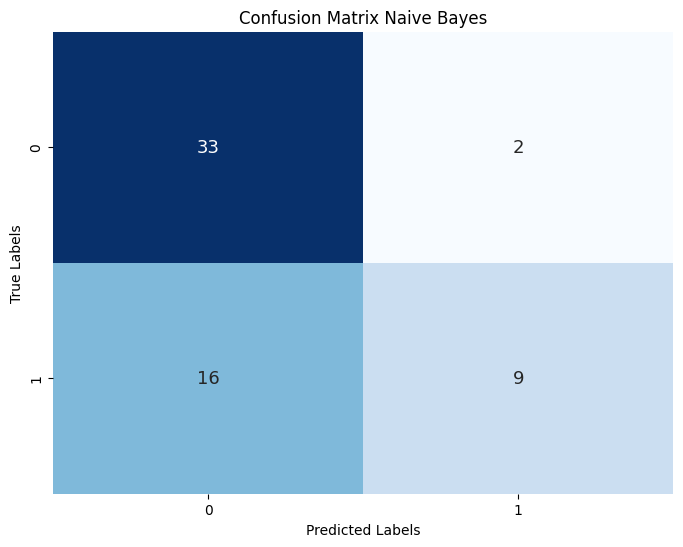

In [72]:

# Step 2: Confusion Matrix Plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_NB, annot=True, cmap='Blues', fmt='g', cbar=False, annot_kws={"size": 13})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Naive Bayes')
plt.show()

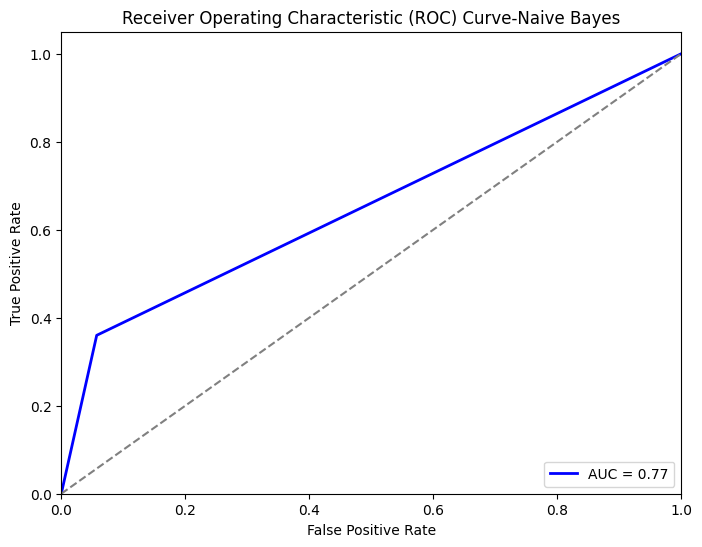

In [73]:
## ROC

# Step 3: AUC-ROC Curve
auc_nb = roc_auc_score(y_test, y_pred_NB)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_NB)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve-Naive Bayes')
plt.legend(loc='lower right')
plt.show()

Gradient Boosting Machines
GBM is another ensemble learning method that builds multiple decision trees sequentially, where each tree corrects the errors of the previous one. 
It's known for its high predictive accuracy and ability to handle complex interactions in the data.

In [74]:
# Step 1: Initialize and fit the Gradient Boosting Classifier
gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [75]:
# Step 2: Predictions
pred_gbm = gbm.predict(X_test)

# Step 3: Evaluate the model
# 3.1. Classification Report
print("Classification Report: GBM")
print(classification_report(y_test, pred_gbm))

Classification Report: GBM
              precision    recall  f1-score   support

           0       0.70      0.89      0.78        35
           1       0.75      0.48      0.59        25

    accuracy                           0.72        60
   macro avg       0.73      0.68      0.69        60
weighted avg       0.72      0.72      0.70        60



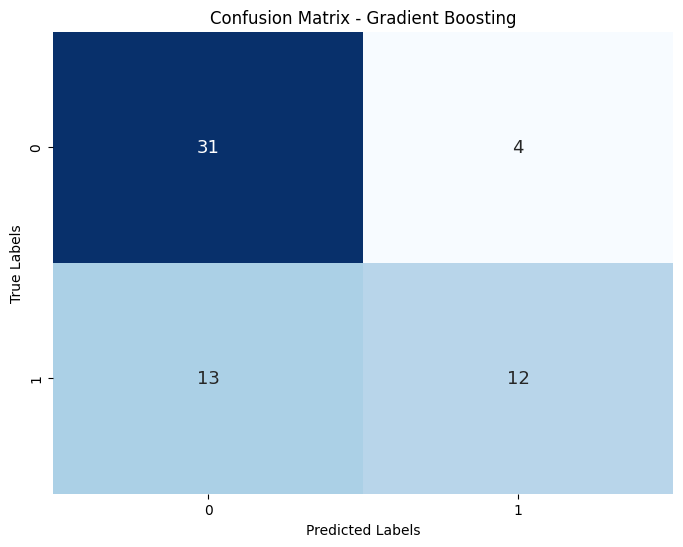

In [76]:
# 3.2. Confusion Matrix Plot
conf_mat_gbm = confusion_matrix(y_test, pred_gbm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_gbm, annot=True, cmap='Blues', fmt='g', cbar=False, annot_kws={"size": 13})  
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

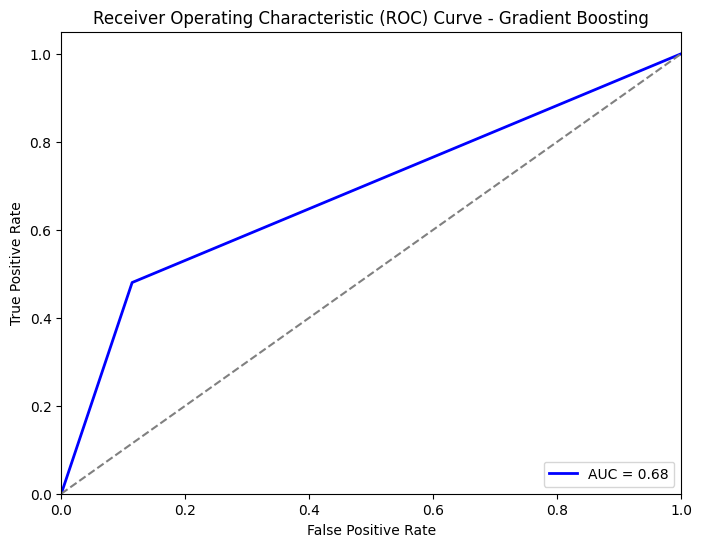

In [77]:
# 3.3. AUC-ROC Curve
auc_gbm = roc_auc_score(y_test, pred_gbm)
fpr_gbm, tpr_gbm, thresholds_gbm = roc_curve(y_test, pred_gbm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gbm, tpr_gbm, color='blue', lw=2, label=f'AUC = {auc_gbm:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Gradient Boosting')
plt.legend(loc='lower right')
plt.show()

NEURAL NETWORK

In [78]:

# Define the neural network architecture
#model = Sequential()
#model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
#model.add(Dense(32, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))

# Compile the model
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
#early_stop = EarlyStopping(monitor='val_loss', patience=5)
#model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])



### Abayomi

## initialize your neural network
#model = Sequential()


## set up your input layer
#model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1] ))

## hidden layer 1
#model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))

##hidden layer 2
#model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))

## regularization
#model.add(Dropout(0.25))

## output layer
#model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

## compiling the network
## optimizer -- adam, sgd - stochastic gradient descxent, rmsprop-- root mean square propagation
## binary classification-- binary_cross_entropy, multi class classification -- categorical_cross_entropy
#model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [79]:
model.summary()

NameError: name 'model' is not defined

In [ ]:
# Train the model
#early_stop = EarlyStopping(monitor='val_loss', patience=5)
#model.fit(X_train, y_train, epochs=100, batch_size=50, validation_data=(X_test, y_test), callbacks=[early_stop])

In [ ]:
model = Sequential()
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu', input_dim=X_train.shape[1])) #initial layer
model.add(Dense(units=16, kernel_initializer='uniform', activation='relu')) ## hidden layer 1
model.add(Dense(units=64, kernel_initializer='uniform', activation='relu')) ## hidden layer 2
model.add(Dense(units=32, kernel_initializer='uniform', activation='relu')) ## hidden layer 3
model.add(Dense(units=16, kernel_initializer='uniform', activation='relu')) ## hidden layer 4
#model.add(Dense(units=8, kernel_initializer='uniform', activation='relu')) ## hidden layer 5
model.add(Dropout(0.3))
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))  ## output layer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



# Train the model
#early_stop = EarlyStopping(monitor='val_loss', patience=10)
#model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop],validation_split=0.20)


# Train the model
history = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_split=0.2)



Epoch 1/100
3/3 [==============================] - 5s 245ms/step - loss: 0.6930 - accuracy: 0.5654 - val_loss: 0.6924 - val_accuracy: 0.7500
Epoch 2/100
3/3 [==============================] - 0s 32ms/step - loss: 0.6924 - accuracy: 0.6911 - val_loss: 0.6915 - val_accuracy: 0.7500
Epoch 3/100
3/3 [==============================] - 0s 27ms/step - loss: 0.6916 - accuracy: 0.6911 - val_loss: 0.6906 - val_accuracy: 0.7500
Epoch 4/100
3/3 [==============================] - 0s 31ms/step - loss: 0.6910 - accuracy: 0.6911 - val_loss: 0.6897 - val_accuracy: 0.7500
Epoch 5/100
3/3 [==============================] - 0s 27ms/step - loss: 0.6903 - accuracy: 0.6911 - val_loss: 0.6887 - val_accuracy: 0.7500
Epoch 6/100
3/3 [==============================] - 0s 29ms/step - loss: 0.6895 - accuracy: 0.6911 - val_loss: 0.6876 - val_accuracy: 0.7500
Epoch 7/100
3/3 [==============================] - 0s 26ms/step - loss: 0.6885 - accuracy: 0.6911 - val_loss: 0.6864 - val_accuracy: 0.7500
Epoch 8/100
3/3 [==

In [ ]:
## save the network
model.save('version.h5')

In [ ]:
## load the file
version_model = tf.keras.models.load_model('version_2.h5')

NameError: name 'tf' is not defined

In [ ]:
## Evaluate the ANN Model

## After training, we'll evaluate the performance of the ANN model on the test data.

# Evaluate the model
scores = version_model.evaluate(X_test, y_test)
print('Accuracy:', scores[1])

2/2 [==============================] - 5s 84ms/step - loss: 0.7640 - accuracy: 0.7500
Accuracy: 0.75


In [ ]:
## Make prediction
y_pred_ann = version_model.predict(X_test)
y_pred_ann

2/2 [==============================] - 3s 16ms/step


array([[6.7494798e-01],
       [4.4918612e-05],
       [2.5473624e-01],
       [9.1593701e-01],
       [4.1419398e-03],
       [6.5512292e-04],
       [7.1835381e-01],
       [4.3202072e-01],
       [7.9836309e-01],
       [2.2172958e-03],
       [4.5887273e-02],
       [2.8647965e-02],
       [8.6187996e-02],
       [3.1310260e-02],
       [8.2014531e-02],
       [5.2334785e-01],
       [2.1155495e-03],
       [6.7756647e-01],
       [1.0780925e-02],
       [6.7392641e-01],
       [7.1069551e-01],
       [6.6376519e-01],
       [6.8525928e-01],
       [6.7725581e-01],
       [7.1225667e-01],
       [4.1748470e-05],
       [1.7188545e-02],
       [3.7095445e-04],
       [2.8057894e-01],
       [3.0800452e-06],
       [6.9242090e-01],
       [6.9844187e-05],
       [7.1275735e-01],
       [7.5199234e-01],
       [7.2922039e-01],
       [7.2697872e-01],
       [1.5578605e-01],
       [9.7797839e-03],
       [2.3363514e-01],
       [7.6235895e-04],
       [6.8147820e-01],
       [7.622439

In [ ]:
## set a threshold
y_pred_ann = np.where(y_pred_ann > 0.5, 1,0)
y_pred_ann

array([[1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1]])

In [ ]:
print(y_test.shape)
print(y_pred_ann.shape)

(60,)
(60, 1)


In [ ]:
## Flatten the y pred
y_pred_ann = y_pred_ann.flatten()

In [ ]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ann})

,Actual,Predicted
281,0,1
265,0,0
164,1,0
9,1,1
77,0,0
278,0,0
93,1,1
109,0,0
5,1,1
173,0,0


In [ ]:
## Classification report NN
print("Classification Report: Neural Network")
print(classification_report(y_test, y_pred_ann))



Classification Report: Neural Network
              precision    recall  f1-score   support

           0       0.78      0.80      0.79        35
           1       0.71      0.68      0.69        25

    accuracy                           0.75        60
   macro avg       0.74      0.74      0.74        60
weighted avg       0.75      0.75      0.75        60



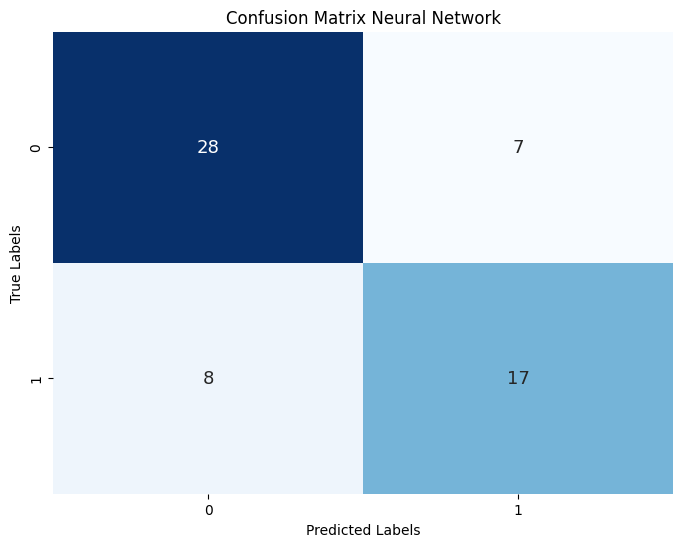

In [ ]:
## confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_ann)
#fig, ax = plot_confusion_matrix(cm, figsize=(4,4), cmap='Greens')
#plt.xlabel('Predictions', fontsize = 18)
#plt.ylabel('Actuals', fontsize = 18)
#plt.title('confusion matrix', fontsize = 18)
#plt.show()

## confusion matrix plot
# Step 2: Confusion Matrix Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, cmap='Blues', fmt='g', cbar=False, annot_kws={"size": 13})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Neural Network')
plt.show()


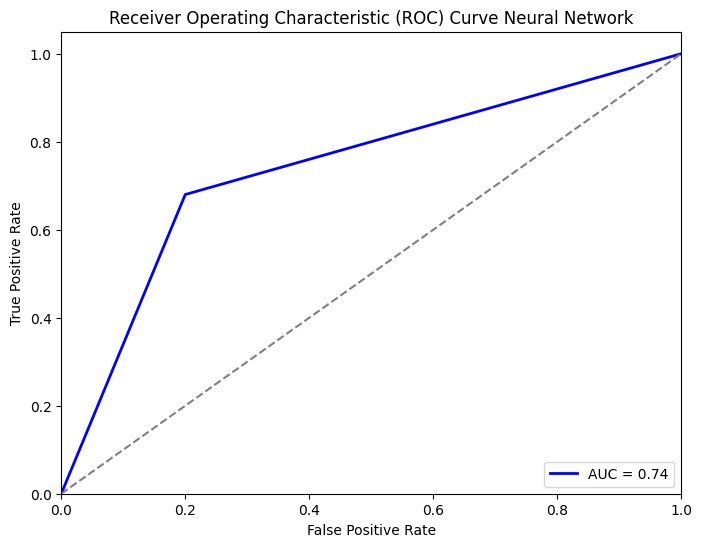

In [ ]:
# Step 3: AUC-ROC Curve
auc = roc_auc_score(y_test, y_pred_ann)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ann)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Neural Network')
plt.legend(loc='lower right')
plt.show()

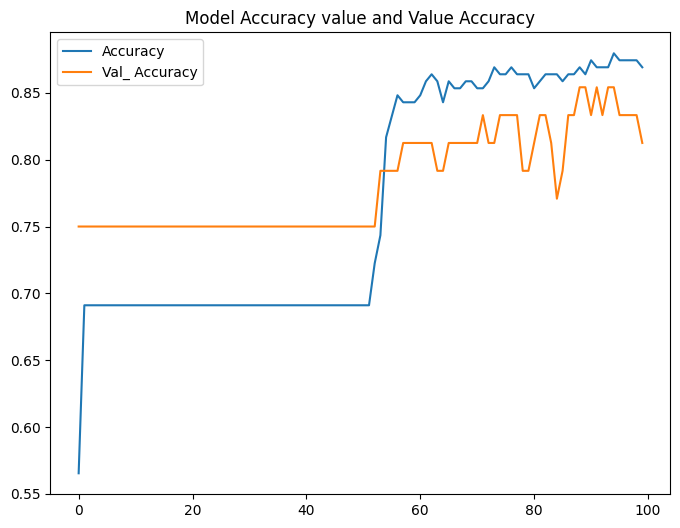

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val_ Accuracy')
plt.title('Model Accuracy value and Value Accuracy')
plt.legend()
plt.show()

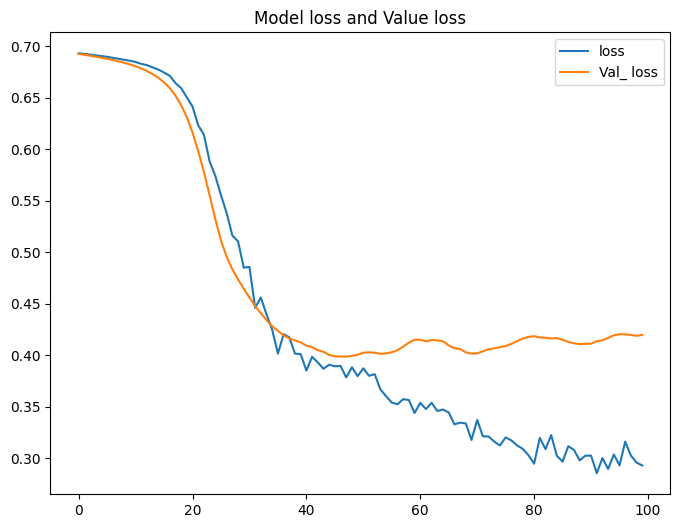

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'Val_ loss')
plt.title('Model loss and Value loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on the testing set
test_loss, test_acc = version_model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')

# Make predictions on new data
#new_data = ... # Load new data for prediction
#predictions = model.predict(new_data)

2/2 [==============================] - 1s 325ms/step - loss: 0.7640 - accuracy: 0.7500
Test Loss: 0.7640
Test Accuracy: 0.7500
